# MOwNiT 

## Laboratorium 3

### Interpolacja

Przed uruchomieniem trzeba zainstalować pakiet:

```julia
Pkg.add("Interpolations")
```

In [1]:
# using Pkg
# Pkg.add("Interpolations")

In [2]:
using Plots

In [3]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
ys = [rand() for x in xs]

10-element Vector{Float64}:
 0.3154888793879942
 0.4586161254173451
 0.9697959462298957
 0.8347542580048304
 0.012397931631038306
 0.30963528500614856
 0.9835990153431924
 0.4561228126632191
 0.18889762518721653
 0.032932524315215206

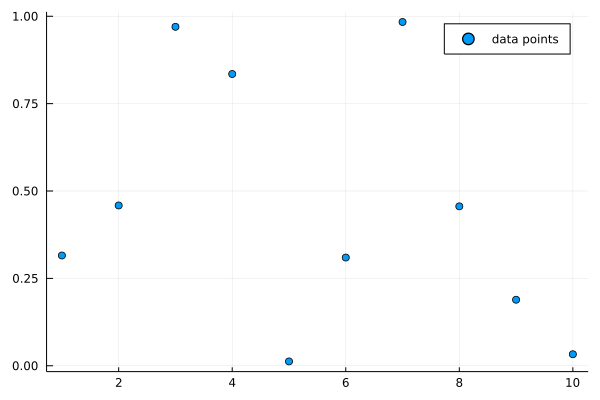

In [4]:
scatter(xs,ys, label="data points")

In [5]:
# Pkg.add("Polynomials")

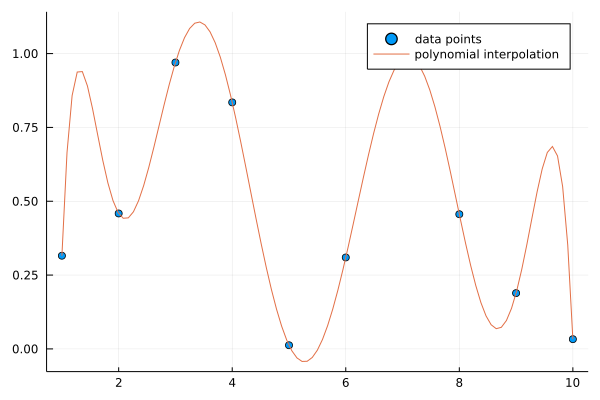

In [6]:
# interpolacja wielomianowa w pakiecie Polynomials
# https://juliamath.github.io/Polynomials.jl/stable/
using Polynomials
f=fit(xs, ys)
plot!(f,  extrema(xs)..., label="polynomial interpolation")

In [7]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

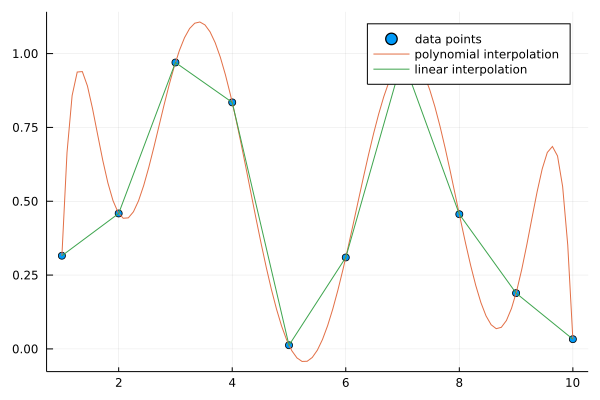

In [8]:
#  interpolacja liniowa z pakietu Interpolations - przykład
using Interpolations
interp_linear = LinearInterpolation(xs, ys)
ysf=[interp_linear(x) for x in xsf]
plot!(xsf,ysf, label="linear interpolation")

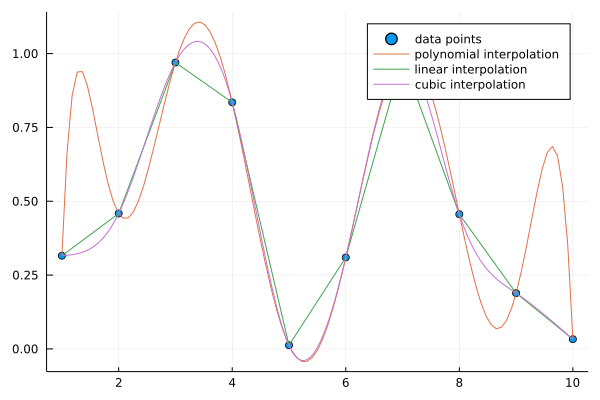

In [9]:
#  interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, ys)
ysf2=[interp_cubic(x) for x in xsf]
plot!(xsf,ysf2, label="cubic interpolation")

In [10]:
#Interpolacja szescienna to BSpline z warunkami brzegowymi Line i OnGrid. 
#Więcej o konfiguracji warunkow brzegowych w
# dokumentacji https://github.com/JuliaMath/Interpolations.jl/blob/master/doc/Interpolations_algebra.pdf
interp_cubic

10-element extrapolate(scale(interpolate(OffsetArray(::Vector{Float64}, 0:11), BSpline(Cubic(Line(OnGrid())))), (1:1:10,)), Throw()) with element type Float64:
 0.3154888793879942
 0.4586161254173451
 0.9697959462298956
 0.8347542580048305
 0.012397931631038361
 0.3096352850061485
 0.9835990153431925
 0.4561228126632192
 0.18889762518721656
 0.032932524315215206

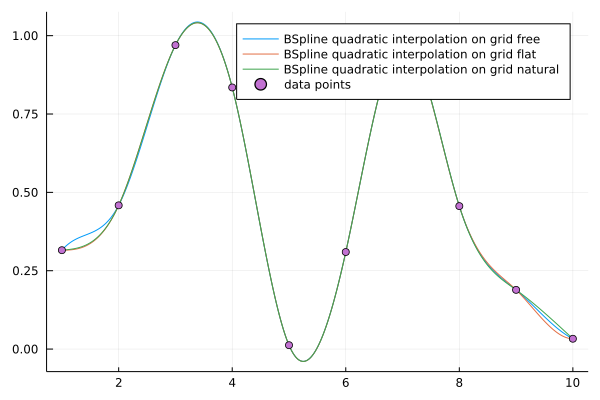

In [11]:
# Przyklad konfiguracji  BSpline-ów
itp = interpolate(ys, BSpline(Cubic(Free(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot(xsf,ysf3, label="BSpline quadratic interpolation on grid free")
itp = interpolate(ys, BSpline(Cubic(Flat(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline quadratic interpolation on grid flat")
itp = interpolate(ys, BSpline(Cubic(Natural(OnGrid()))))
ysf3=[itp(x) for x in xsf]
plot!(xsf,ysf3, label="BSpline quadratic interpolation on grid natural")

scatter!(xs,ys, label="data points")


### Zadania
1. Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na wielomian interpolacyjny  Lagrange'a .  Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. <b>(1 pkt)</b>

1. Zrobic to samo dla metody  Newtona (metoda ilorazów róznicowych).Narysować wykres wielomianu interpolacyjnego otrzymanego metodą Newtona dla tych samych danych, co w poprzednim punkcie. Zadbać o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji, według schematu z pakietu Interpolations http://juliamath.github.io/Interpolations.jl/stable/interpolations/ : 
   1. napisać funkcję `NewtonInterpolation`, która wylicza ilorazy różnicowe i zwraca "obiekt interpolacyjny" `newt`
   1. napisać funkcję która wylicza wartość wielomianu dla obiektu `newt` w punkcie x za pomocą  <b>schematu Hornera dla postaci Newtona </b> <b>(2 pkt)</b>

1. Zastosowac interpolację wielomianową z pakietu Polynomials  do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego? <b>(1 pkt)</b>

1. Porownać  metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Uwaga: dodatkowo, dla metody Newtona i pakietu Polynomials należy osobno zmierzyć czas wyliczania wielomianu i osobno czas wyliczania wartości w punkcie. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.  Jako narzedzie do analizy danych użyć Julia DataFrames. <b>(2 pkt)</b>

1. Zaimplementować algorytm Neville’a i sprawdzić (dla kilku wybranych punktów), czy daje te same wartości wielomianu co wybrana interpolacja wielomianowa.<b>(1 pkt)</b>

1. Poeksperymentować z  interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane),  narysować wykresy i porównać z wykresami interpolacji wielomianowej. <b>Zademonstrować  efekt Rungego</b> <b>(1 pkt)</b>. 



### 1. Lagrange interpolation

In [12]:
function lagrange_base(x_coord, index, X, Y, n)
    b = [(x_coord - X[i])/(X[index] - X[i]) for i in 1:n if i != index]
#     println(size(b)[1])
    return prod(b) * Y[index]
end

lagrange_base (generic function with 1 method)

In [13]:
lagrange_base(2.5,1,[1 2 3 4 5 6],[1 3 2 4 6 7],6)

-0.02734375

In [14]:
function lagrange_value(x_coord,X,Y)
    n = length(X)
    values = [lagrange_base(x_coord,i,X,Y,n) for i in 1:n ]
    return sum(values)
end

lagrange_value (generic function with 1 method)

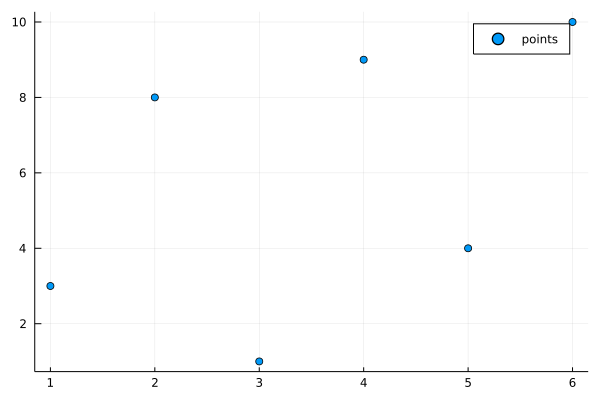

In [15]:
X = [i for i in 1:6]
Y = [3, 8, 1, 9, 4, 10]
scatter(X,Y, label = "points")

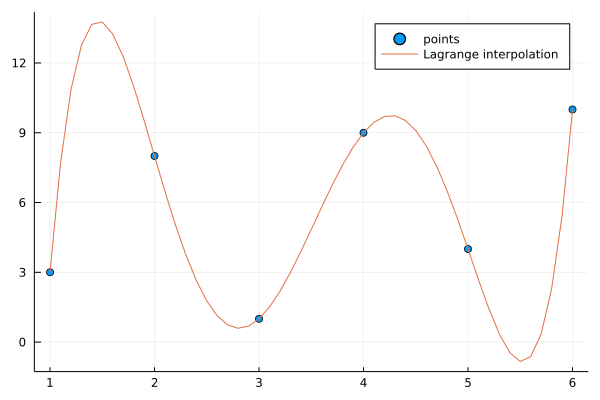

In [16]:
res_range = 1:0.1:6
# [println(i) for i in res_range]
IV = [lagrange_value(i,X,Y) for i in res_range]
# println(IV)
plot!(res_range, IV, label = "Lagrange interpolation")

## 2. Newton Interpolation

In [17]:
function newton_horner(coef, X, x_coord)
    n = length(X)
    res = coef[1]
    x_prod = 1
#     println(x_prod)
#     println(res)
    for i in 2:n
        x_prod = x_prod * (x_coord - X[i-1])
        res = res + x_prod * coef[i]
#         println(x_prod)
#         println(res)
    end
    return res
end

newton_horner (generic function with 1 method)

In [18]:
function newton_coefficients(X,Y)
    n = length(X)
    m =  zeros(Float64, n, n)
    #zerowe ilorazy roznicowe
    for i in 1:n
        m[i,1] = Y[i]
    end
#     display(m)
    #1-sze ilorazy roznicowe
    for i in 2:n
        m[i,2] = (m[i,1] - m[i-1,1]) / (X[i] - X[i-1])
    end
#     display(m)
    #2itd
    for j in 3:n
        for i in j:n
            m[i, j] = (m[i, j-1] - m[i-1, j-1]) / (X[i] - X[i-j+1] )
        end
    end
    coef = [m[i,i] for i in 1:n]
#     display(m)
#     println(coef)
    
    #return coefficients
#     return coef
    
    
    #return cinterpolation object
    newton_inter_object = x -> newton_horner(coef, X, x)
    return newton_inter_object
end

newton_coefficients (generic function with 1 method)

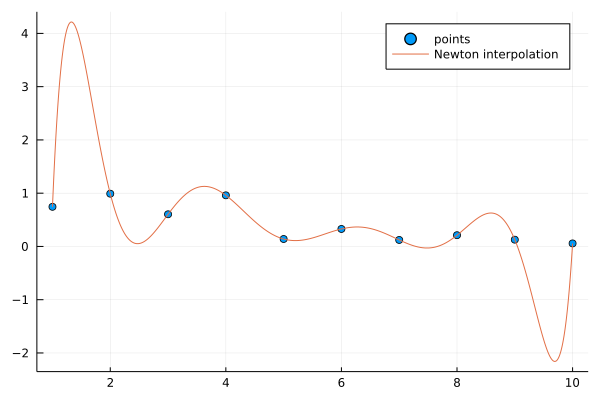

In [19]:
Xn = [i for i in 1:10]
Yn = rand(10)
scatter(Xn,Yn, label = "points")

newt_obj = newton_coefficients(Xn,Yn)
NV = [newt_obj(i) for i in 1:0.01:10]
# # println(IV)
plot!(1:0.01:10, NV, label = "Newton interpolation")

## 3. Interpolation from Polynomials package + Comparison 

In [20]:
comp_x =  1:1:10
comp_y = [rand() for x in comp_x]

10-element Vector{Float64}:
 0.31842112857361093
 0.3750050204384616
 0.8750202164288083
 0.6954660886965243
 0.8717976203907949
 0.08709102988696782
 0.7194216609519388
 0.5083477112741928
 0.8563212394016613
 0.7449465518005434

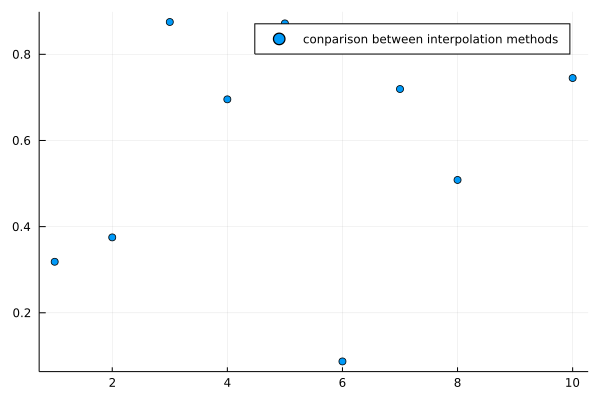

In [21]:
scatter(comp_x, comp_y, label="conparison between interpolation methods")

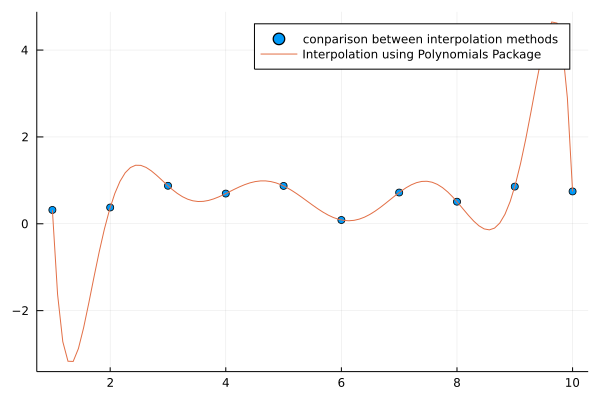

In [22]:
using Polynomials
package = fit(comp_x, comp_y)
plot!(package,  extrema(comp_x)..., label="Interpolation using Polynomials Package")

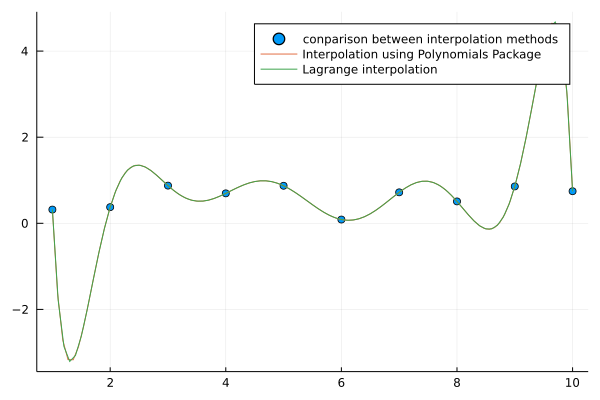

In [23]:
res_range = min(comp_x...):0.1:max(comp_x...)
lag_results = [lagrange_value(i,comp_x,comp_y) for i in res_range]
# println(lag_results)
# println(res_range)
plot!(res_range, lag_results, label = "Lagrange interpolation")

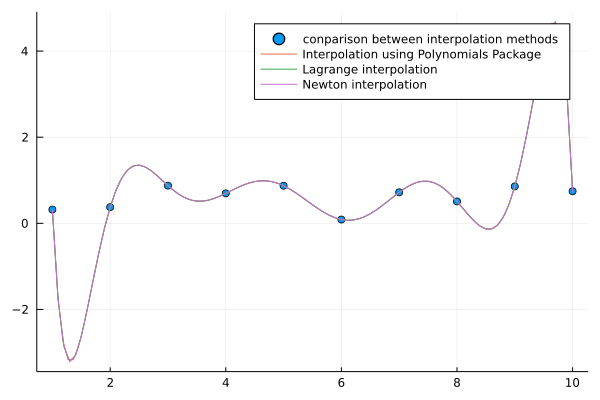

In [24]:
newt_obj = newton_coefficients(comp_x, comp_y)
newton_results = [newt_obj(i) for i in res_range]
# println(newton_results )
plot!(res_range, newton_results, label = "Newton interpolation")

Zauważam, że krzywe się pokrywają. Wynika to z twierdzenia, które mówi, że istnieje tylko 1 wielomian n-tego stopnia przechodzący przez punkty

## 4. Time tests

In [25]:
function random_n_points(n)
    X = [i for i=1:n]
    Y =  rand(n)
    return X, Y
end

random_n_points (generic function with 1 method)

In [26]:
xt1, yt1 = random_n_points(4)
println(xt1)
println(yt1)

[1, 2, 3, 4]
[0.8805292609946753, 0.9298977194348788, 0.5047719194432592, 0.41188007767291546]


In [27]:
function lagrange_whole_time(X,Y,res_range)
    return  sum([@elapsed lagrange_value(i,X,Y) for i in res_range])
end

lagrange_whole_time (generic function with 1 method)

In [28]:
function newton_whole_time(X,Y,res_range)
    a = @elapsed  newton_coefficients(X,Y)
    newt_obj = newton_coefficients(X,Y)
    b =  sum([@elapsed newt_obj(i) for i in res_range])
    return a + b
end

newton_whole_time (generic function with 1 method)

In [29]:
function polynomials_whole_time(X,Y,res_range)
    a = @elapsed (fit(X,Y))
    func = fit(X,Y)
    b = sum([@elapsed func(i) for i in res_range])
    return a + b
end

polynomials_whole_time (generic function with 1 method)

In [30]:
n = 5
tr1 = 1:0.10:n

1.0:0.1:5.0

In [31]:
println(lagrange_whole_time(xt1,yt1,tr1))
println(newton_whole_time(xt1,yt1,tr1))
println(polynomials_whole_time(xt1,yt1,tr1))

2.5259999999999995e-5
4.149999999999999e-6
1.259e-5


In [32]:
using DataFrames
df1 = DataFrame(points = Int64[], 
    interpolation = String[],
    time = Float64[])

,points,interpolation,time
,Int64,String,Float64


In [33]:
 #start and interval
interval = 10
tr1 = interval:interval:10*interval

10:10:100

In [34]:
for i=tr1
    xt, yt = random_n_points(i)
    tr = 1:0.01:i
    push!(df1, [i "l" lagrange_whole_time(xt,yt,tr)])
    push!(df1, [i "n" newton_whole_time(xt,yt,tr)])
    push!(df1, [i "p" polynomials_whole_time(xt,yt,tr)])
#     push!(df, [3  6]
end


In [35]:
df1

,points,interpolation,time
,Int64,String,Float64
1,10,l,0.00196908
2,10,n,2.825e-5
3,10,p,3.641e-5
4,20,l,0.0398539
5,20,n,0.000171769
6,20,p,6.9639e-5
7,30,l,0.0444249
8,30,n,0.000180678
9,30,p,0.00013127


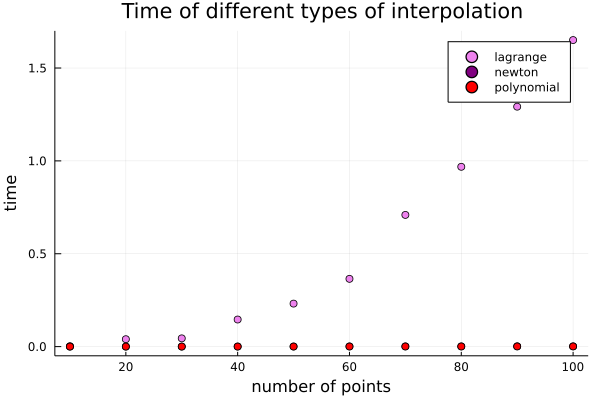

In [36]:
# using Plots
scatter([df1[df1[:,2] .== "l", :].points df1[df1[:,2] .== "n", :].points df1[df1[:,2] .== "p", :].points],
    [df1[df1[:,2] .== "l", :].time df1[df1[:,2] .== "n", :].time  df1[df1[:,2] .== "p", :].time ],
    colour = [:violet :purple :red],
    label = ["lagrange" "newton" "polynomial"],
    title = "Time of different types of interpolation",
    xlab = "number of points",
    ylab = "time"
)

### Newton and Polynomials polynomial counting time

In [37]:
function newton_start_time(X,Y,res_range)
    a = @elapsed  newton_coefficients(X,Y)
    return a
end

newton_start_time (generic function with 1 method)

In [38]:
function polynomials_start_time(X,Y,res_range)
    return @elapsed (fit(X,Y))
end

polynomials_start_time (generic function with 1 method)

In [39]:
df2 = DataFrame(points = Int64[], 
    interpolation = String[],
    time = Float64[])

,points,interpolation,time
,Int64,String,Float64


In [40]:
 #start and interval
interval2 = 500
tr2 = interval2:interval2:10*interval2

500:500:5000

In [41]:
for i=tr2
    for j=1:10
        xt, yt = random_n_points(i)
        tr = 1:0.01:i
        push!(df2, [i "n" newton_start_time(xt,yt,tr)])
        push!(df2, [i "p" polynomials_start_time(xt,yt,tr)])
    end
#     push!(df, [3  6]
end

In [42]:
df2

,points,interpolation,time
,Int64,String,Float64
1,500,n,0.000552396
2,500,p,0.000257748
3,500,n,0.000528566
4,500,p,0.000246689
5,500,n,0.000506906
6,500,p,0.000255439
7,500,n,0.000515136
8,500,p,0.000245589
9,500,n,0.0248663


In [43]:
df2grouped = groupby(df2, [:points, :interpolation])

,points,interpolation,time
,Int64,String,Float64
1,500,n,0.000552396
2,500,n,0.000528566
3,500,n,0.000506906
4,500,n,0.000515136
5,500,n,0.0248663
6,500,n,0.000305898
7,500,n,0.000286418
8,500,n,0.000321418
9,500,n,0.000336528


In [44]:
using Statistics

In [45]:
df2_to_plot = combine(df2grouped, "time" => mean, "time" => std)

,points,interpolation,time_mean,time_std
,Int64,String,Float64,Float64
1,500,n,0.00288456,0.00772453
2,500,p,0.000255002,1.92798e-5
3,1000,n,0.00260459,9.79628e-5
4,1000,p,0.00095636,1.03419e-5
5,1500,n,0.00728491,0.00330942
6,1500,p,0.00211182,6.02449e-6
7,2000,n,0.00971755,0.00289144
8,2000,p,0.00373162,4.7823e-5
9,2500,n,0.0189685,0.0160299


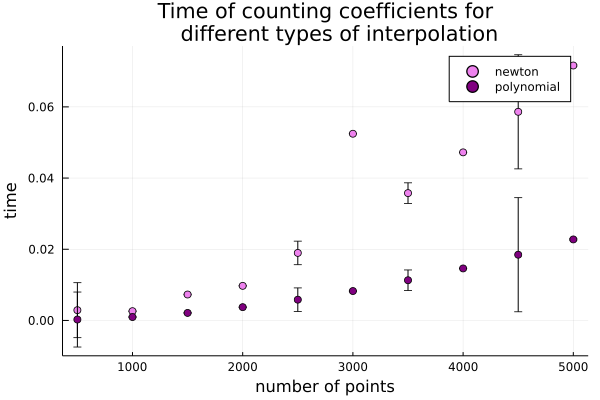

In [46]:
# using Plots
scatter([ df2_to_plot[df2_to_plot[:,2] .== "n", :].points df2_to_plot[df2_to_plot[:,2] .== "p", :].points],
    [ df2_to_plot[df2_to_plot[:,2] .== "n", :].time_mean  df2_to_plot[df2_to_plot[:,2] .== "p", :].time_mean ],
    colour = [:violet :purple],
    yerr = df2_to_plot.time_std,
    label = [ "newton" "polynomial"],
    title = "Time of counting coefficients for
    different types of interpolation",
    xlab = "number of points",
    ylab = "time"
)

### Newton and Polynomials values counting time

In [47]:
function newton_end_time(X,Y,res_range)
    newt_obj = newton_coefficients(X,Y)
    b =  sum([@elapsed newt_obj(i) for i in res_range])
    return b
end

newton_end_time (generic function with 1 method)

In [48]:
function polynomials_end_time(X,Y,res_range)
    func = fit(X,Y)
    return sum([@elapsed func(i) for i in res_range])
end

polynomials_end_time (generic function with 1 method)

In [49]:
df3 = DataFrame(points = Int64[], 
    interpolation = String[],
    time = Float64[])

,points,interpolation,time
,Int64,String,Float64


In [50]:
 #start and interval
interval3 = 100
tr3 = interval3:interval3:10*interval3

100:100:1000

In [51]:
for i=tr3
    for j=1:10
        xt, yt = random_n_points(i)
        tr = 1:0.01:i
        push!(df3, [i "n" newton_end_time(xt,yt,tr)])
        push!(df3, [i "p" polynomials_end_time(xt,yt,tr)])
    end
#     push!(df, [3  6]
end

In [52]:
df3

,points,interpolation,time
,Int64,String,Float64
1,100,n,0.00130528
2,100,p,0.000696666
3,100,n,0.00130616
4,100,p,0.000699933
5,100,n,0.00130604
6,100,p,0.000702475
7,100,n,0.00131651
8,100,p,0.000675946
9,100,n,0.00130967


In [53]:
df3grouped = groupby(df3, [:points, :interpolation])

,points,interpolation,time
,Int64,String,Float64
1,100,n,0.00130528
2,100,n,0.00130616
3,100,n,0.00130604
4,100,n,0.00131651
5,100,n,0.00130967
6,100,n,0.00130492
7,100,n,0.00131615
8,100,n,0.00128256
9,100,n,0.00130477


In [54]:
# using Statistics

In [55]:
df3_to_plot = combine(df3grouped, "time" => mean, "time" => std)

,points,interpolation,time_mean,time_std
,Int64,String,Float64,Float64
1,100,n,0.00130498,9.65191e-6
2,100,p,0.000698192,8.91328e-6
3,200,n,0.00467219,2.47269e-5
4,200,p,0.00191745,1.70782e-5
5,300,n,0.0100864,1.39834e-5
6,300,p,0.0029205,6.07331e-5
7,400,n,0.0175054,0.000223187
8,400,p,0.00387879,1.39566e-5
9,500,n,0.027095,3.5098e-5


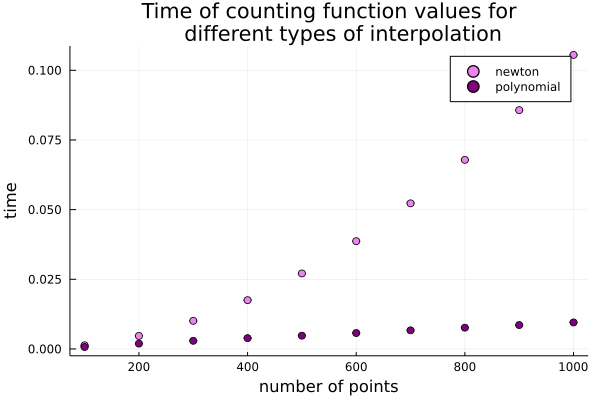

In [56]:
# using Plots
scatter([ df3_to_plot[df3_to_plot[:,2] .== "n", :].points df3_to_plot[df3_to_plot[:,2] .== "p", :].points],
    [ df3_to_plot[df3_to_plot[:,2] .== "n", :].time_mean  df3_to_plot[df3_to_plot[:,2] .== "p", :].time_mean ],
    colour = [:violet :purple],
    yerr = df3_to_plot.time_std,
    label = [ "newton" "polynomial"],
    title = "Time of counting function values for
    different types of interpolation",
    xlab = "number of points",
    ylab = "time"
)

### 5. Neville's algorithm

In [57]:
function neville(X,Y,x_cd)
    n = length(X)
    m =  zeros(Float64, n, n+1)
    # 1 column
    for i in 1:n
        m[i,1] = X[i]
    end
    # 2 column
    for i in 1:n
        m[i,2] = Y[i]
    end
#     display(m)
    # rest of the columns
    for col=3:n+1
        for row=1:n+2-col
            m[row,col] = (x_cd - X[row])*m[row+1,col-1] - (x_cd - X[row+1])*m[row,col-1]
            m[row,col] /= (X[row+1] - X[row])
        end
    end
#     display(m)
    return m[1,n]
end

neville (generic function with 1 method)

In [58]:
X_ntest = [8.1 8.3 8.6 8.7]
Y_ntest = [16.9446 17.56492 18.50515 18.82091]

1×4 Matrix{Float64}:
 16.9446  17.5649  18.5052  18.8209

In [59]:
neville(X_ntest, Y_ntest , 8.4)

17.879955000000002

### Comparing Neville's algorithm to newton interpolation

In [60]:
nn_cmp_x = [3.2    3.6     3.7      3.8     4       4.1]
nn_cmp_y = [7.6354 7.46434 7.854754 8.02135 8.34563 8.46546]
nn_newt_obj = newton_coefficients(nn_cmp_x,nn_cmp_y)

#12 (generic function with 1 method)

In [61]:
nn_points = [3.554 3.675 3.564 3.6456 3.7524]
for i=nn_points
    println("for point: ", i)
    a = nn_newt_obj(i)
    b = neville(nn_cmp_x, nn_cmp_y , i)
    println("Newton: ",a,"   Neville:  ",b)
    println("difference = ", abs(a - b))
    println()
end

for point: 3.554
Newton: 7.180068350153993   Neville:  6.94901615138141
difference = 0.23105219877258332

for point: 3.675
Newton: 7.7843477437913675   Neville:  7.811001007019041
difference = 0.026653263227673918

for point: 3.564
Newton: 7.247331402152898   Neville:  7.084278479060925
difference = 0.16305292309197306

for point: 3.6456
Newton: 7.679637636095345   Neville:  7.729206536735311
difference = 0.049568900639965996

for point: 3.7524
Newton: 7.95867350637252   Neville:  8.074732178889397
difference = 0.11605867251687663



### 6. Spline experiments

Poeksperymentować z interpolacją funkcjami sklejanymi (minimum dwie różne funkcje sklejane), narysować wykresy i porównać z wykresami interpolacji wielomianowej. Zademonstrować efekt Rungego (1 pkt)

##### Function 1

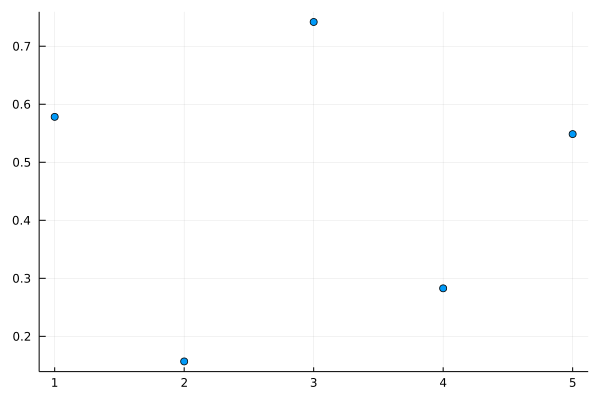

In [62]:
x_spline1 = 1:5
y_spline1 = [rand() for x in x_spline1]
scatter(x_spline1, y_spline1, label="")

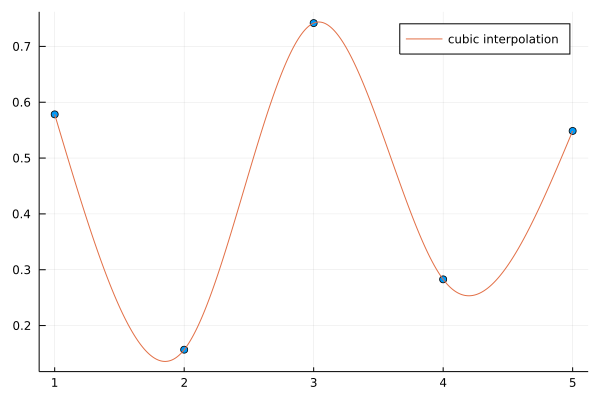

In [63]:
x_draw1 = 1:0.01:5
interp_cubic1 = CubicSplineInterpolation(x_spline1, y_spline1)
y_draw1 =[interp_cubic1(x) for x in x_draw1]
println()
plot!(x_draw1,y_draw1, label="cubic interpolation")

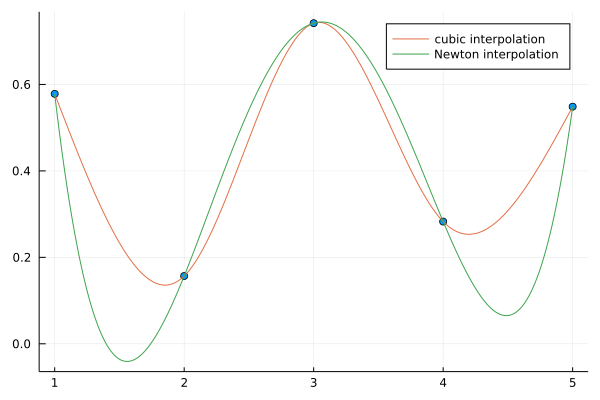

In [64]:
newt_obj5 = newton_coefficients(x_spline1, y_spline1)
newton_results5 = [newt_obj5(i) for i in x_draw1]
# println(newton_results )
plot!(x_draw1, newton_results5, label = "Newton interpolation")

##### Function 2

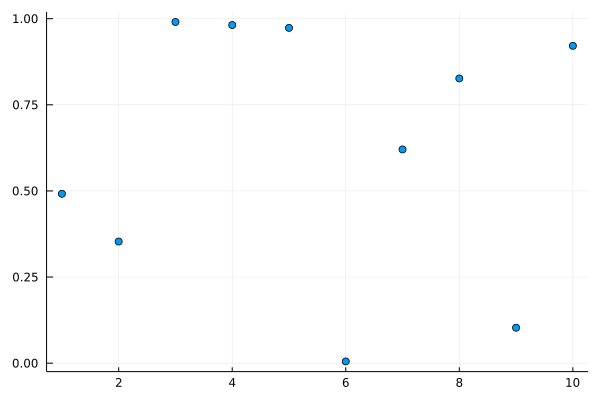

In [65]:
x_spline2 = 1:10
y_spline2 = [rand() for x in x_spline2]
scatter(x_spline2, y_spline2, label="")

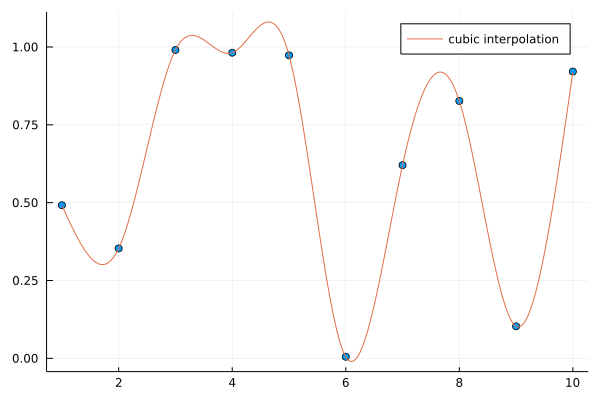

In [66]:
x_draw2 = 1:0.01:10
interp_cubic2 = CubicSplineInterpolation(x_spline2, y_spline2)
y_draw2 =[interp_cubic2(x) for x in x_draw2]
plot!(x_draw2,y_draw2, label="cubic interpolation")

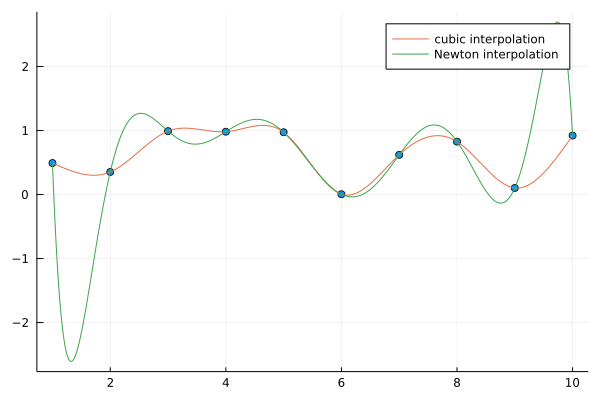

In [67]:
newt_obj6 = newton_coefficients(x_spline2, y_spline2)
newton_results6 = [newt_obj6(i) for i in x_draw2]
# println(newton_results )
plot!(x_draw2, newton_results6, label = "Newton interpolation")

Przetestowałem funkcje z 5 i 10 węzłami

W przypadku większej ilości węzłów jest widoczny efekt Rungego - czyli wraz ze wzrostem węzłów zmniejszyła się dokładność wielomianu interpolującego obliczonego metodą Newtona. Kolejnym czynnikiem, który pogarsza ten efekt jest równa odległość pomiędzy węzłami

W przypadku konstrukcji wielomianu funkcjami spline, funkcja ta jest znacznie dokładniejsza